# Laboratorium 4 - Kacper Dudczak

## Zadanie 4.1



Dla różnych wartości długości kroku 𝛼∈{0.001,0.01,0.1} stwórz wykres, który zilustruje progresję wartości 𝐽(𝜃) dla pierwszych 200 króków algorytmu gradientu prostego:

- Oś 𝑥 wykresu to kolejne kroki algorytmu – od 0 do 200.
- Oś 𝑦 wykresu to wartosci 𝐽(𝜃).
- Wykres powinien skłądać się z trzech krzywych:
    - dla 𝛼=0.000001
    - dla 𝛼=0.00001
    - dla 𝛼=0.0001

In [61]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

In [62]:
data = pd.read_csv("fires_thefts.csv", names=["x", "y"])
print(data)

x = data[["x"]].to_numpy().flatten()
y = data[["y"]].to_numpy().flatten()

       x    y
0    6.2   29
1    9.5   44
2   10.5   36
3    7.7   37
4    8.6   53
5   34.1   68
6   11.0   75
7    6.9   18
8    7.3   31
9   15.1   25
10  29.1   34
11   2.2   14
12   5.7   11
13   2.0   11
14   2.5   22
15   4.0   16
16   5.4   27
17   2.2    9
18   7.2   29
19  15.1   30
20  16.5   40
21  18.4   32
22  36.2   41
23  39.7  147
24  18.5   22
25  23.3   29
26  12.2   46
27   5.6   23
28  21.8    4
29  21.6   31
30   9.0   39
31   3.6   15
32   5.0   32
33  28.6   27
34  17.4   32
35  11.3   34
36   3.4   17
37  11.9   46
38  10.5   42
39  10.7   43
40  10.8   34
41   4.8   19


In [63]:
# Hipoteza: funkcja liniowa jednej zmiennej

def h(theta, x):
    return theta[0] + theta[1] * x

In [64]:
def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

In [65]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if current_cost > prev_cost:
            print("Zbyt duża długość kroku!")
            break
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

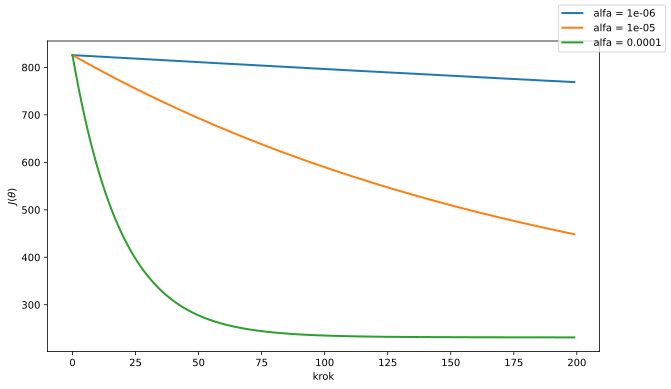

In [66]:
alphas = [0.000001, 0.00001, 0.0001]

fig = plt.figure(figsize=(16*.6, 9*.6))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.set_xlabel('krok')
ax.set_ylabel(r'$J(\theta)$')

for alpha in alphas:
    best_theta, logs = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=alpha, eps=0.0001)


    X = np.arange(0, 200, 1)
    Y = [logs[step][0] for step in X]
    ax.plot(X, Y, linewidth='2', label=(f' alfa = {alpha}'))
fig.legend()

## Zadanie 4.2
Podziel zbiór danych na dwie równe części. Pierwszą z nich wykorzystaj do trenowania, a drugą do ewaluacji. Oblicz MSE wytrenowanego modelu danych.

In [67]:
data_to_split = pd.read_csv("fires_thefts.csv", names=["x", "y"])
print("Dane z csv: ")
print(data_to_split)

Dane z csv: 
       x    y
0    6.2   29
1    9.5   44
2   10.5   36
3    7.7   37
4    8.6   53
5   34.1   68
6   11.0   75
7    6.9   18
8    7.3   31
9   15.1   25
10  29.1   34
11   2.2   14
12   5.7   11
13   2.0   11
14   2.5   22
15   4.0   16
16   5.4   27
17   2.2    9
18   7.2   29
19  15.1   30
20  16.5   40
21  18.4   32
22  36.2   41
23  39.7  147
24  18.5   22
25  23.3   29
26  12.2   46
27   5.6   23
28  21.8    4
29  21.6   31
30   9.0   39
31   3.6   15
32   5.0   32
33  28.6   27
34  17.4   32
35  11.3   34
36   3.4   17
37  11.9   46
38  10.5   42
39  10.7   43
40  10.8   34
41   4.8   19


In [74]:
#podzial tablicy na  dwie rowne czesci
split_array = np.array_split(data_to_split, 2)
print("\nDane do trenowania:")
print(split_array[0])
print("\nDane do testow:")
print(split_array[1])

training_data = split_array[0]
test_data = split_array[1]


Dane do trenowania:
       x   y
0    6.2  29
1    9.5  44
2   10.5  36
3    7.7  37
4    8.6  53
5   34.1  68
6   11.0  75
7    6.9  18
8    7.3  31
9   15.1  25
10  29.1  34
11   2.2  14
12   5.7  11
13   2.0  11
14   2.5  22
15   4.0  16
16   5.4  27
17   2.2   9
18   7.2  29
19  15.1  30
20  16.5  40

Dane do testow:
       x    y
21  18.4   32
22  36.2   41
23  39.7  147
24  18.5   22
25  23.3   29
26  12.2   46
27   5.6   23
28  21.8    4
29  21.6   31
30   9.0   39
31   3.6   15
32   5.0   32
33  28.6   27
34  17.4   32
35  11.3   34
36   3.4   17
37  11.9   46
38  10.5   42
39  10.7   43
40  10.8   34
41   4.8   19


In [75]:
x_training_data = training_data[["x"]].to_numpy().flatten()
y_training_data = training_data[["y"]].to_numpy().flatten()

x_test_data = test_data[["x"]].to_numpy().flatten()
y_test_data = test_data[["y"]].to_numpy().flatten()

In [76]:
def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

best_theta, log = gradient_descent(h, J, [0.0, 0.0], x_training_data, y_training_data, alpha=0.001, eps=0.0000001)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % log[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(log))) 

<IPython.core.display.Math object>

In [77]:
def mse(expected, predicted):
    """Błąd średniokwadratowy"""
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

In [78]:
# Obliczenie przewidywań modelu
y_pred = h(best_theta, x_test_data)

# Obliczenie MSE na zbiorze testowym (im mniejszy MSE, tym lepiej!)
evaluation_result = mse(y_test_data, y_pred)

#wyświetlenie wyniku
display(Math(r'\large\textrm{MSE = %f}' % evaluation_result))

<IPython.core.display.Math object>